<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sampling</a></span></li><li><span><a href="#Add-data-to-the-sampling" data-toc-modified-id="Add-data-to-the-sampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add data to the sampling</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Result</a></span><ul class="toc-item"><li><span><a href="#lambda" data-toc-modified-id="lambda-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>lambda</a></span></li><li><span><a href="#cost" data-toc-modified-id="cost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>cost</a></span></li></ul></li></ul></div>

# import

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS
%matplotlib inline
from scipy.spatial.distance import cdist
from smt.sampling_methods import LHS
import glob
from scipy.interpolate import griddata
import re
from numpy import genfromtxt

In [10]:
cost= 2.12828575682E+009
dhdt=0.16518E+17
beta=9.60898877644E+004
eta=2.81578026518E+004

cost/eta


75584.22733259508

# Sampling

(21, 3)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.16227766e-07 1.99526231e+05 1.99526231e+03]
 [1.25892541e-09 3.16227766e+04 3.16227766e+05]
 [1.25892541e-06 7.94328235e+05 5.01187234e+02]
 [3.16227766e-08 1.25892541e+05 1.99526231e+02]
 [1.99526231e-06 5.01187234e+04 5.01187234e+05]
 [1.99526231e-08 1.25892541e+02 1.99526231e+04]
 [1.99526231e-09 3.16227766e+03 1.25892541e+02]
 [7.94328235e-06 3.16227766e+02 7.94328235e+03]
 [3.16227766e-06 1.99526231e+02 5.01187234e+04]
 [7.94328235e-07 3.16227766e+05 1.99526231e+05]
 [5.01187234e-08 5.01187234e+03 3.16227766e+03]
 [5.01187234e-09 5.01187234e+05 7.94328235e+02]
 [5.01187234e-06 7.94328235e+02 5.01187234e+03]
 [5.01187234e-07 1.99526231e+03 7.94328235e+05]
 [7.94328235e-08 1.99526231e+04 3.16227766e+02]
 [7.94328235e-09 1.25892541e+04 1.25892541e+04]
 [1.25892541e-08 5.01187234e+02 7.94328235e+04]
 [1.25892541e-07 7.94328235e+04 1.25892541e+03]
 [1.99526231e-07 1.25892541e+03 1.25892541e+05]
 [3.16227766e-09 7.94328235e+03 

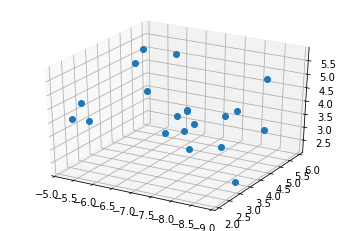

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.16227766e-06 7.94328235e+04 1.99526231e+05]
 [5.01187234e-07 7.94328235e+05 3.16227766e+03]
 [5.01187234e-08 5.01187234e+03 7.94328235e+02]
 [5.01187234e-09 1.99526231e+04 1.25892541e+04]
 [3.16227766e-07 1.99526231e+02 1.25892541e+03]
 [7.94328235e-08 7.94328235e+03 3.16227766e+04]
 [3.16227766e-08 7.94328235e+02 5.01187234e+05]
 [1.25892541e-07 5.01187234e+02 5.01187234e+02]
 [5.01187234e-06 1.25892541e+02 3.16227766e+02]
 [1.25892541e-09 5.01187234e+05 1.25892541e+05]
 [1.99526231e-09 1.25892541e+05 1.99526231e+03]
 [1.25892541e-08 3.16227766e+03 5.01187234e+03]
 [7.94328235e-06 3.16227766e+02 1.25892541e+02]
 [1.99526231e-08 3.16227766e+04 1.99526231e+02]
 [1.99526231e-07 1.99526231e+05 7.94328235e+04]
 [7.94328235e-09 5.01187234e+04 5.01187234e+04]
 [3.16227766e-09 1.99526231e+03 1.99526231e+04]
 [1.99526231e-06 1.25892541e+04 7.94328235e+03]
 [7.94328235e-07 1.25892541e+03 3.16227766e+05]
 [1.25892541e-06 3.16227766e+05 7.943282

In [14]:
# a=[1.0E-06, 1.0E-07]
# z=[1.0E3, 1.0E4]
# e=[1.0e5, 1.0e6]

#cost= 2.12828575682E+009

x=np.array([[0,0,0]])
a=([-5.0, -9.0])# 0.16518E+17
z=([2.0, 6.0])#9.60898877644E+004 beta
e=([2.0, 6.0])# eta


xlimits = np.array([a,z,e])
sampling = LHS(xlimits=xlimits)#,criterion='ese')

num = 20
y = sampling(num)
lambda1=np.append(x,10**y,axis=0)
    
print(lambda1.shape)
print(lambda1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(y[:, 0],y[:, 1],y[:,2], "o")
ax.set_xlim(a)
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

plt.show()

# np.savetxt('../../../inversion/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN',lambda1,delimiter=' ')
# np.savetxt('/home/urrutyb/occigen/TiPACCS/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN',lambda1,delimiter=' ')

lambda1 = genfromtxt(
    '../../../inversion/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN', delimiter=' ')[:, :]

print(lambda1)

# Add data to the sampling

In [3]:
class addLHS(object):
    def __init__(self, nlevel, xlimits, firstlhs):
        """
        Constructor where values of options can be passed in.
        Parameters
        ----------
        nlevel : integer.
            The number of design of experiments to be built
        xlimits : ndarray
            The interval of the domain in each dimension with shape (nx, 2)
        """
        self.nlevel = nlevel
        self.xlimits = xlimits
        self.firstlhs = firstlhs
        


    def __call__(self,nb_samples_hifi):
        """
        Builds nlevel nested design of experiments of dimension dim and size n_samples.
        Each doe sis built with the optmized lhs procedure.
        Builds the highest level first; nested properties are ensured by deleting
        the nearest neighbours in lower levels of fidelity.
        Parameters
        ----------
        nb_samples_hifi: The number of samples of the highest fidelity model.
            nb_samples_fi(n-1) = 2 * nb_samples_fi(n)
        Returns
        ------
        list of length nlevel of design of experiemnts from low to high fidelity level.
        """
        x=self.xlimits[0,:]
        y=self.xlimits[1,:]
        z=self.xlimits[2,:]
        
        ind=[]
        for i in self.firstlhs:
            if not x[0]<=i[0]<=x[1]:
                ind.append(int(np.where( self.firstlhs[:,0]==i[0])[0]))
#                 print('x',ind)
            else:
                if not y[0]<=i[1]<=y[1]:
                    print()
                    ind.append(int(np.where( self.firstlhs[:,1]==i[1])[0]))
#                     print('y',ind)
                else:
                    if not z[0]<=i[2]<=z[1]:
                        ind.append(int(np.where( self.firstlhs[:,2]==i[2])[0]))
#                         print('z',ind)
        
#         self.firstlhs=np.delete(self.firstlhs,ind,0)
        nb=len(self.firstlhs)
        nt = []
        if nb==0:
            print('len(self.firstlhs)==0')
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * nb_samples_hifi)
        else:
            for i in range(self.nlevel, 0, -1):
                nt.append(pow(2, i - 1) * len(self.firstlhs))

        if len(nt) != self.nlevel:
            raise ValueError("nt must be a list of nlevel elements")
        if np.allclose(np.sort(nt)[::-1], nt) == False:
            raise ValueError("nt must be a list of decreasing integers")
        doe = []
        p0 = LHS(xlimits=self.xlimits, criterion="ese")
        doe.append(p0(nt[0]))
        for i in range(1, self.nlevel):
            p = LHS(xlimits=self.xlimits, criterion="ese")
            doe.append(p(nt[i]))
        doe[-1]=self.firstlhs
        for i in range(1, self.nlevel)[::-1]:
            ind = []
            d = cdist(doe[i], doe[i - 1], "euclidean")
            for j in range(doe[i].shape[0]):
                dj = np.sort(d[j, :])
                k = dj[0]
                l = (np.where(d[j, :] == k))[0][0]
                m = 0
                while l in ind:
                    m = m + 1
                    k = dj[m]
                    l = (np.where(d[j, :] == k))[0][0]
                ind.append(l)
                
            doe[i - 1] = np.delete(doe[i - 1], ind, axis=0)
            doe[i - 1] = np.vstack((doe[i],doe[i - 1]))
        return doe,nb


xdoes = addLHS(nlevel=4, xlimits=xlimits,firstlhs=np.log10(lambda1))
doe,nb=xdoes(20) #argument est la longueur de lambda1
x1,x2,x3,x4=doe

/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log10


In [4]:
print(10**x3)

# np.savetxt('/home/urrutyb/occigen/TiPACCS/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN',10**x3,fmt='%10.3e')
# np.savetxt('../../../inversion/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN',10**x3,fmt='%10.3e')


[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.21700000e+15 4.21700000e+29 7.49900000e+29]
 [2.37100000e+18 4.21700000e+27 7.49900000e+26]
 [2.37100000e+15 4.21700000e+25 2.37100000e+29]
 [7.49900000e+18 7.49900000e+27 7.49900000e+27]
 [1.33400000e+14 2.37100000e+26 4.21700000e+28]
 [2.37100000e+17 1.33400000e+29 4.21700000e+26]
 [1.33400000e+15 7.49900000e+25 1.33400000e+30]
 [7.49900000e+14 4.21700000e+26 4.21700000e+27]
 [2.37100000e+16 7.49900000e+28 7.49900000e+30]
 [2.37100000e+14 1.33400000e+28 2.37100000e+27]
 [7.49900000e+16 1.33400000e+27 2.37100000e+26]
 [1.33400000e+16 2.37100000e+28 1.33400000e+26]
 [1.33400000e+18 7.49900000e+26 2.37100000e+28]
 [4.21700000e+14 2.37100000e+29 4.21700000e+30]
 [4.21700000e+18 7.49900000e+29 4.21700000e+29]
 [7.49900000e+15 2.37100000e+27 1.33400000e+28]
 [4.21700000e+17 4.21700000e+28 7.49900000e+28]
 [1.33400000e+17 2.37100000e+25 1.33400000e+29]
 [7.49900000e+17 1.33400000e+26 2.37100000e+30]
 [4.21700000e+16 1.33400000e+25 1.334000

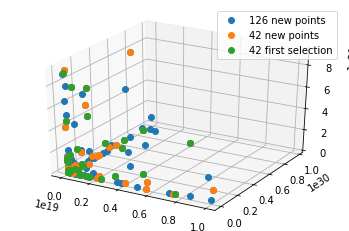

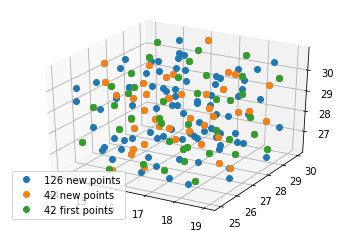

In [5]:
# print(len(x1),len(x2),len(x3), len(x4))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(10**x1[:, 0],10**x1[:, 1],10**x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(10**x2[:, 0],10**x2[:, 1],10**x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(10**x3[:, 0],10**x3[:, 1],10**x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(10**x4[:, 0],10**x4[:, 1],10**x4[:,2], "o",label=str(nb)+ ' first selection')

ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first points')
plt.legend()
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# xdoes = addLHS(nlevel=4, xlimits=xlimits,firstlhs=lambda1)
# doe,nb=xdoes(20) 
# x1,x2,x3,x4=doe
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1[:, 0],x1[:, 1],x1[:,2], "o",label=str(nb*7) + ' new points')
# ax.plot(x2[:, 0],x2[:, 1],x2[:,2], "o",label=str(nb*3) + ' new points')
# ax.plot(x3[:, 0],x3[:, 1],x3[:,2], "o",label=str(nb) + ' new points')
# ax.plot(x4[:, 0],x4[:, 1],x4[:,2], "o",label=str(nb)+' first selection')
# ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

# plt.legend()


# plt.show()

# Result

In [6]:
def sort_human(l):
    def convert(text): return float(text) if text.isdigit() else text
    def alphanum(key): return [convert(c)
                               for c in re.split('([-+]?[0-9]*\.?[0-9]*)', key)]
    l.sort(key=alphanum)
    return l


size = 20
params = {'legend.fontsize': 'large',
          #           'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
url = '/home/urrutyb/occigen/TiPACCS/inversion_antarctica/step_3_inversion/avec_erreur/OPTIM_MUMPS_R*_24/'
#url = '/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_MUMPS_R*/'

lambda1 = genfromtxt(
    '/home/urrutyb/occigen/TiPACCS/inversion_antarctica/step_3_inversion/LREG_avecDHDt_avecVisco.IN', delimiter=' ')[1:, :]


n = sort_human(glob.glob(url + "Cost_R*.dat"))[1:]
# print(n)
RMS = np.zeros(len(n))
cost = np.zeros(len(n))
for i in range(len(n)):
    RMS[i] = np.loadtxt(n[i], unpack=True)[3, -1]
    cost[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('RMS=', RMS)
print('cost=', cost)


n = sort_human(glob.glob(url + "Cost_dHdt_R*.dat"))[1:]
# print(n)
dhdt = np.zeros(len(n))
for i in range(len(n)):
    dhdt[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_div=', dhdt)

n = sort_human(glob.glob(url + "CostRegEta_R*.dat"))[1:]
# print(n)
eta = np.zeros(len(n))
for i in range(len(n)):
    eta[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_eta=', eta)

n = sort_human(glob.glob(url + "CostRegBeta_R*.dat"))[1:]
# print(n)
beta = np.zeros(len(n))
for i in range(len(n)):
    beta[i] = np.loadtxt(n[i], unpack=True)[1, -1]
print('J_beta=', beta)

Jtot = cost+lambda1[:, 0]*dhdt+lambda1[:, 2]*eta+lambda1[:, 1]*beta
print('Jtot=', Jtot)

RMS= [ 94.84677456 133.43918607 115.62160202 141.75515009 107.80830581
  97.09475743  95.91394201  89.51640876  85.92947125  85.64692348
  72.95315672  63.71561879 109.02710894 103.83806581 120.89293862
  68.82547866  91.3567055   71.29485232  82.39713598  60.68551065
 102.18854344  66.97504926  87.82265171 107.45071204  91.79795971
  67.83191056  99.23783649  71.61893214  79.8784391   88.85818848
  95.69859078 120.85065011 119.69120081  61.13988813  77.79595876
 135.2854174  108.69325613  83.98939579 113.74548518  69.38292931]
cost= [3.59365809e+32 1.68404501e+32 1.75828955e+32 2.03352603e+32
 1.50410907e+32 1.78049786e+32 2.13793386e+32 1.32158331e+32
 3.26454895e+32 1.42425334e+32 1.33966922e+32 1.49094147e+32
 1.58697823e+32 3.83358457e+32 4.03611797e+32 1.42366081e+32
 1.92559971e+32 1.68616134e+32 2.37847959e+32 1.31831231e+32
 2.09141899e+32 1.38836582e+32 2.11813534e+32 2.34582661e+32
 1.31248498e+32 1.62336958e+32 1.72700722e+32 2.40981727e+32
 2.61866284e+32 1.83030173e+32 2.

ValueError: operands could not be broadcast together with shapes (41,) (40,) 

In [ ]:
n

## lambda

Je représente l'effet de la variation du paramètre de régularisation sur la fonction coût correspondant
On observe que donner du poids au fonction cout $J_\eta$ et $J_\beta$ permet de les réduire.
La pénalisation de la divergence du flux donne un résulats plus bruité qui semble montrer une augmentation de la fonction coût en augmentant $\lambda_{div}$.


In [ ]:
fig,((ax3,ax2),(ax1,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=[9,10])

ax3.scatter(np.log10(lambda1[:,0]),dhdt,c=RMS)
ax3.scatter(np.log10(lambda1[RMS==min(RMS),0]),dhdt[RMS==min(RMS)],s=50,c='r')
ax3.set_title(r'$J_{div}=f(log_{10}\lambda_{div})$')
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax2.scatter(np.log10(lambda1[:,1]),beta,c=RMS)
ax2.scatter(np.log10(lambda1[RMS==min(RMS),1]),beta[RMS==min(RMS)],s=50,c='r')
ax2.set_title(r'$J_\beta=f(log_{10}\lambda_\beta)$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

img=ax1.scatter(np.log10(lambda1[:,2]),eta,c=RMS)
ax1.scatter(np.log10(lambda1[RMS==min(RMS),2]),eta[RMS==min(RMS)],s=50,c='r')
ax1.set_title(r'$J_\eta =f(log_{10}\lambda_\eta)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))



ax4.scatter(np.log10(lambda1[:,0]),Jtot,c=RMS)
ax4.scatter(np.log10(lambda1[RMS==min(RMS),0]),Jtot[RMS==min(RMS)],s=50,c='r')
ax4.set_title(r'$J_{tot}=f(log_{10}\lambda_{div})$')
ax4.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax5.scatter(np.log10(lambda1[:,1]),Jtot,c=RMS)
ax5.scatter(np.log10(lambda1[RMS==min(RMS),1]),Jtot[RMS==min(RMS)],s=50,c='r')
ax5.set_title(r'$J_{tot}=f(log_{10}\lambda_\beta)$')
ax5.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax6.scatter(np.log10(lambda1[:,2]),Jtot,c=RMS)
ax6.scatter(np.log10(lambda1[RMS==min(RMS),2]),Jtot[RMS==min(RMS)],s=50,c='r')
ax6.set_title(r'$J_{tot} =f(log_{10}\lambda_\eta)$')
ax6.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


cb=fig.colorbar(img)
cb.set_label('RMS')


plt.tight_layout()

Je représente ici les paramètres de régularisation en fonction de la RMS. On observe une relation exponentielle entre la RMS et le parametre de regularisation $\lambda_\eta$.

Pour $\lambda_\beta$ et $\lambda_{div}$ aucune relation directe n'est observé

In [ ]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=[9,7])
img=ax1.scatter(RMS,np.log10(lambda1[:,0]))
ax1.set_title(r'$log_{10} \lambda_{div}=f(RMS)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax1.set_ylim(1.0E-05, 1.0E-08)

img=ax2.scatter(RMS,np.log10(lambda1[:,1]))
ax2.set_title(r'$log_{10} \lambda_{\beta}=f(RMS)$')
# ax2.set_ylim(1.0E2,1.0E5)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
ax3.scatter(RMS,np.log10(lambda1[:,2]))
ax3.set_title(r'$log_{10} \lambda_{\eta}=f(RMS)$')
# ax3.set_ylim(1.0e4, 1.0e7)
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


plt.tight_layout()

In [ ]:
min(RMS)

La représentation en 3 dimensions permet d'observer pour quel trio de paramètres notre RMS est la plus faible.

In [ ]:

fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
img=ax.scatter(np.log10(lambda1[:,0]),np.log10(lambda1[:,1]),np.log10(lambda1[:,2]),s=100,c=RMS)
ax.scatter(np.log10(lambda1[RMS==min(RMS),0]),np.log10(lambda1[RMS==min(RMS),1]),np.log10(lambda1[RMS==min(RMS),2]),s=200,c='r')
# img=ax.scatter(RMS,lambda1[:,0],lambda1[:,1],s=100,c=RMS)

# ax.plot(lambda1[:,0],lambda1[:,1],lambda1[:,2])
# ax.set_xlim(1.0E-06, 1.0E-07)
# ax.set_ylim(1.0E3, 1.0E4)
# ax.set_zlim(1.0e5, 1.0e6)
ax.set_xlabel('$\lambda_{div}$')

ax.set_ylabel(r'$\lambda_{\beta}$')
ax.set_zlabel(r'$\lambda_{\eta}$')
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
cb=fig.colorbar(img)
cb.set_label('RMS')
plt.tight_layout()

J'ai extrapolé les valeurs ci-dessus sur une grille de 20x20x20 pour faire une représentation de l'espace et choisir les paramètres.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata as gd
import time

#read values

x = lambda1[:,0]
y = lambda1[:,1]
z = lambda1[:,2]
v = RMS




#generate new grid X,Y,Z
print("Generate new grid...")
start_time=time.clock()
xi,yi,zi=np.ogrid[14:19:20j, 25:30:20j, 26:31:20j]
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")

#interpolate "data.v" on new grid "X,Y,Z"
print("Interpolate...")
start_time=time.clock()
V = gd((x,y,z), v, (X,Y,Z), method='linear')
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")


#Plot interpolated values
fig2 = plt.figure(figsize=[9,7])
ax2=fig2.gca(projection='3d')
sc2=ax2.scatter(X, Y, Z, c=V, cmap=plt.jet())
cb=plt.colorbar(sc2)
cb.set_label('RMS')
ax2.set_xlabel('$\lambda_{div}$')
ax2.set_ylabel(r'$\lambda_{\beta}$')
ax2.set_zlabel(r'$\lambda_{\eta}$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.tight_layout

#Show plots
plt.show()

## cost

Je choisi maintenant de représenté les valeurs des fonctions côut les unes en fonctions des autres.

In [ ]:
save=[]
for i in range(len(cost)):
    if 0.1e32<cost[i]<2e32:
        if eta[i]<1e4:
            if beta[i]<2e04:
                if RMS[i]<100:
                    save.append(i)
                
print(save,len(save))

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=[18,6])
img=ax1.scatter(cost,eta,c=RMS)

# ax1.set_ylim([min(eta)-0.1e-5,max(eta)+0.1e-5])
# ax1.set_xlim([min(beta)-1e-5,max(beta)+1e-5])
cb=fig.colorbar(img,ax=ax3)
cb.set_label('Cost')
ax1.set_title(r'$J_\eta=f(J_v)$')
ax1.ticklabel_format(axis='both',style='sci',scilimits=(0,2))

ax2.scatter(cost,beta,c=RMS)

cb.set_label('RMS')
# ax2.set_ylim([min(beta)-1e-5,max(beta)+1e-5])
ax2.set_title(r'$J_\beta=f(J_{v})$')
# ax2.set_xlim(10,15)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))


ax3.scatter(cost,dhdt,c=RMS)

ax3.set_title(r'$J_{div}=f(J_{v})$')
# ax3.set_ylim([min(eta)-0.1e-5,max(eta)+0.1e-5])
ax3.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
# ax3.set_ylim([1e-5,3e-5])
# ax3.set_xlim(10,15)

plt.tight_layout()
for x in save:
    ax1.scatter(cost[x],eta[x],c='r',marker="P",s=100)
    ax2.scatter(cost[x],beta[x],c='r',marker="P",s=100)
    ax3.scatter(cost[x],dhdt[x],c='r',marker="P",s=100)
    print(lambda1[x,:],'x=',x,'RMS=',RMS[x])





# plt.savefig('/home/urrutyb/occigen/TiPACCS/inversion_antarctica/l-curve/l-curve.pdf')

In [ ]:
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
img=ax.scatter(dhdt,beta,eta,s=100,c=RMS)
# img=ax.scatter(RMS,lambda1[:,0],lambda1[:,1],s=100,c=RMS)

# ax.set_xlim(1.0E-06, 1.0E-07)
# ax.set_ylim(1.0E3, 1.0E4)
# ax.set_zlim(1.0e5, 1.0e6)
# ax.set_xlim(10,15)

ax.set_xlabel('$J_{div}$')

ax.set_ylabel(r'$J_\beta$')
ax.set_zlabel(r'$J_\eta$')
ax.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
cb=fig.colorbar(img)
cb.set_label('RMS')
plt.tight_layout()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata as gd
import time

#read values

x = dhdt*1e-13
y = eta*1e-3
z = beta*1e-5
v = cost*1e-8

#generate new grid X,Y,Z
print("Generate new grid...")
start_time=time.clock()
xi,yi,zi=np.ogrid[1.0:10.0:21j, 0:10:21j, 0:10:21j] #a modifier
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")

#interpolate "data.v" on new grid "X,Y,Z"
print("Interpolate...")
start_time=time.clock()
V = gd((x,y,z), v, (X,Y,Z), method='linear')
print ('time needed: ', time.clock()-start_time, ' seconds')
print("")


#Plot interpolated values
fig2 = plt.figure(figsize=[9,7])
ax2=fig2.gca(projection='3d')
sc2=ax2.scatter(X, Y, Z, c=V, cmap=plt.hot())
cb=plt.colorbar(sc2)
cb.set_label('RMS')
ax2.set_xlabel('$\lambda_{div}$')
ax2.set_ylabel('$\lambda_{beta}$')
ax2.set_zlabel('$\lambda_{eta}$')
ax2.ticklabel_format(axis='both',style='sci',scilimits=(0,2))
plt.tight_layout

#Show plots
plt.show()